<a href="https://colab.research.google.com/github/daryacodes/portfolio/blob/main/CNN_dogs_and_cat_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [6]:
!unzip -q kagglecatsanddogs_5340.zip #unpack zip folder

replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PetImages/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]
error:  invalid response [[n]]
replace PetImages/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PetImages/Cat/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!ls

 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'


In [8]:
!ls PetImages #tell us subfolders of PetImage

Cat  Dog


In [9]:
#now check imaages labels for each class; 2 classes (Cat Dog); will be used LATER
# to test + predict whether new image is an image of C or D
path = 'PetImages'
classes = os.listdir(path)
classes

['Dog', 'Cat']

In [11]:
#now, run code + see Pet Image (e.g, Dog 2497.jps) and it's label (1=d, 0 =c )
# to see a DIFF pet image type or label, change the print(inputpath[0]), label[0]) value

input_path = []
label = []

for class_name in os.listdir('PetImages'):
  for path in os.listdir('PetImages/' + class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)

    input_path.append(os.path.join('PetImages', class_name, path))
  print(input_path[0], label[0])

PetImages/Dog/4451.jpg 1
PetImages/Dog/4451.jpg 1


In [12]:
# now to see total #s of images 23,412 images of dogs + cats ...
len(input_path)

25002

In [18]:
# now we are making a DataFrame
  # good to organise our images data in a structured way...
  # we have image data + corresponding labels, so use DataFrame as input to build + train CNN model !

# a DataFrame is a TABULAR data structure provided by libs like pandas
  # DF can have columns for 1) file paths, 2) input images, and 3) labels.
  # can be used to organise + manipulate data more efficiently !

# when our DF is made, we should be able to see a TABULAR RESULT w/ list of images + their labels

df = pd.DataFrame()
# create list to store file paths, labels, + other metadata
df['Images'] = input_path
df['label'] = label
# create a DF
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Images,label
0,PetImages/Dog/214.jpg,1
1,PetImages/Dog/4333.jpg,1
2,PetImages/Cat/7822.jpg,0
3,PetImages/Cat/2792.jpg,0
4,PetImages/Dog/7892.jpg,1


In [20]:
# now preprocessing
  # use filter function to delete
  # wrong encoded, such as non-image (Thumbs.db) types OR corrupted images(JFIF)

num_skipped = 0
for folder_name in ("Cat", "Dog"):
  folder_path = os.path.join("PetImages", folder_name)
  for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
      fobj = open(fpath, "rb")
      is_jfif = b"JFIF" in fobj.peek(10)
    finally:
      fobj.close()

      if not is_jfif:
        num_skipped += 1
        # delete corrupted image
        os.remove(fpath)
print(f"Deleted {num_skipped} images")

Deleted 1590 images


In [22]:
# now we can check non-image files from image dataset(e.g, Thumbs.db) + delete them
for i in df['Images']:
  if '.jpg' not in i:
    print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [23]:
import PIL
l = []
for  image in df['Images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l


['PetImages/Dog/8194.jpg',
 'PetImages/Dog/11526.jpg',
 'PetImages/Cat/8367.jpg',
 'PetImages/Dog/8713.jpg',
 'PetImages/Dog/1685.jpg',
 'PetImages/Cat/4629.jpg',
 'PetImages/Dog/3645.jpg',
 'PetImages/Cat/11382.jpg',
 'PetImages/Dog/3927.jpg',
 'PetImages/Cat/147.jpg',
 'PetImages/Cat/7487.jpg',
 'PetImages/Cat/6770.jpg',
 'PetImages/Cat/1658.jpg',
 'PetImages/Dog/5631.jpg',
 'PetImages/Cat/841.jpg',
 'PetImages/Dog/2970.jpg',
 'PetImages/Dog/1482.jpg',
 'PetImages/Dog/4620.jpg',
 'PetImages/Dog/11410.jpg',
 'PetImages/Cat/1180.jpg',
 'PetImages/Cat/2721.jpg',
 'PetImages/Cat/4245.jpg',
 'PetImages/Cat/9794.jpg',
 'PetImages/Dog/10289.jpg',
 'PetImages/Dog/8248.jpg',
 'PetImages/Dog/7739.jpg',
 'PetImages/Dog/10200.jpg',
 'PetImages/Cat/9321.jpg',
 'PetImages/Cat/8839.jpg',
 'PetImages/Cat/307.jpg',
 'PetImages/Dog/8655.jpg',
 'PetImages/Dog/3252.jpg',
 'PetImages/Dog/11357.jpg',
 'PetImages/Dog/9259.jpg',
 'PetImages/Cat/10831.jpg',
 'PetImages/Dog/5742.jpg',
 'PetImages/Dog/9145.jpg

In [ ]:
# after deleting these, we get list of good pet images :)

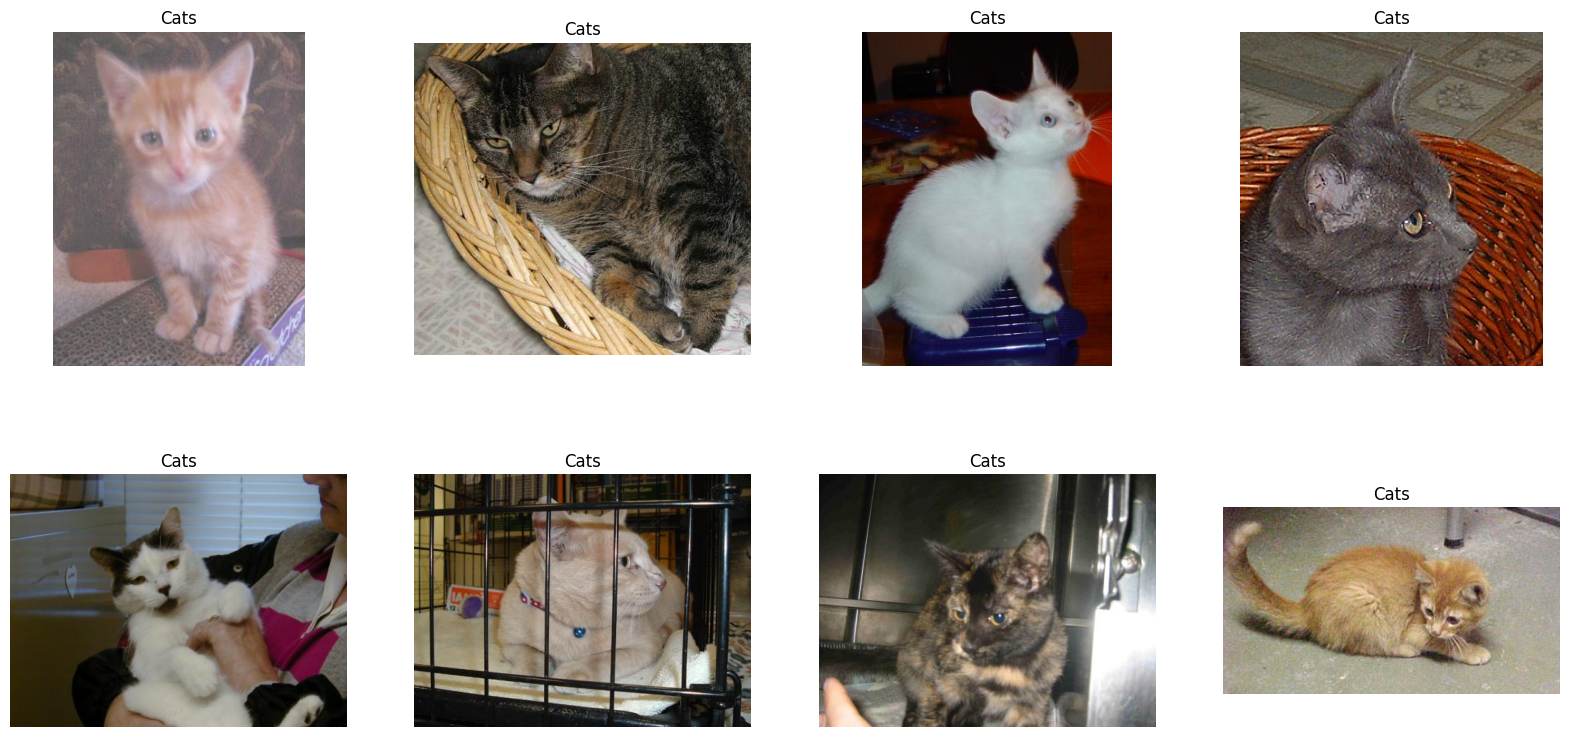

In [26]:
#now, to see plot samples of Cats images, we need this code:
plt.figure(figsize = (20,20)) #show only cats image 20x20 size
temp = df[df['label'] ==0] ['Images']
start = random.randint(0, len(temp))
files = temp[start:start+8]


for index, file in enumerate(files):
  plt.subplot(4,4, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

In [28]:
# now, need some Image Preparation BEFORE we feed them --> AI CNNs model
# can be done using Keras lib
# first, load specified images + their labels
df['label'] = df['label'].astype('str')
df.head()

,Images,label
0,PetImages/Dog/214.jpg,1
1,PetImages/Dog/4333.jpg,1
2,PetImages/Cat/7822.jpg,0
3,PetImages/Cat/2792.jpg,0
4,PetImages/Dog/7892.jpg,1


In [29]:
# now split input images into train + test sets; easier for model to learn from each
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [36]:
# now use data generator to load + preprocess batches of images in training
# Keras gives ImageDataGenerator class for this purpose !!

# use train_generator() to rescale images (rescale tensors from values b/w 0-255)
# overcome fitting issue, we use augmentation of images w/ rotation range = 40

# image augmentation is a common tech used to overcome fitting in CNNs
# artificially increase diversity of training dataset by apply various transformations to existing images !!
# helps model perform better w/ unseen or new image dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, # normalisation of images
    rotation_range = 40, # augmentation of imgs to avoid overfitting rotation (rotate image by a certain amount)
    shear_range = 0.2,
    zoom_range = 0.2, # range of zoom into/out of image
    horizontal_flip = True, #flip image horizontally
    fill_mode = 'nearest'
)

# now create generator for training image dataset
val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col = 'Images',
    y_col = 'label',

    #we used batch_size of 512; specify dimensiosn to which our input imgs will be resized
    # the # of images that will be processed in each batch during training
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 152
)

# now create generator for validation image dataset
val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col = 'Images',
    y_col = 'label',
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 152
)



Found 18733 validated image filenames belonging to 2 classes.
Found 4677 validated image filenames belonging to 2 classes.


In [42]:
# now we need to BUILD CNN MODEL ! magic time
# define parameters to build our AI model
# CNNs should have:
  # convolution layers
  # 2x2 pool size
  # 3x3 kernel
  # ReLU (rectified linear unit) activation function; transforms summed weight input from neuron --> activation of neuron OR output for that input
  # output layer for binary classification w/ 'sigmoid' activation (d + c)

from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# create a Sequential model
model = Sequential([
    #convol layer w/ 16 filter, 3x3 kernel + ReLU AF
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)), #150x150 img
    MaxPool2D((2,2)), #2x2 pool size

    # conv layer w/ 64 filter, 3x3 kernel + ReLU AF
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),

    Flatten(), #layer flattens 3D feature maps --> 1D
    Dense(512, activation='relu'), #creates fully connected layer w/ ReLU AF
    Dense(1, activation='sigmoid'), # create output layer w/ single neuron
])

In [44]:
# now model optimisation: both train + validation accuracy will be monitored during training
  # Adaptive Momentum estimation (Adam for short) is an optimiser to find optimal sol'n for minimum loss AND performance classification :)
  # the performance of classification can be measured w/ accuracy metrics function for comparing predicted label + ground truth label

  # in output, see total # of parameters which network needs to learn during training
  # usually, parameters are the weights + biases assoc w/ connections b/w neurons in the CNNs

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    29,491,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,501,953 (112.54 MB)

 Trainable params: 29,501,953 (112.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# so the model (sequential model) + model type or layers, as well as output shape + parameters are shown
# can see the # of parameters that they use (e.,g here over 29 million !)
# same as non-training parameters

In [45]:
# next, we can build CNNs model using the following parameters
  # --> epochs: refer to complete pass thru entire training dataset
    # e.,g see number "1/10" in context of epoch; likely reps progress thru training dataset (in terms of batches :) )

# THIS MAY TAKE SOME TIME if we choose large epochs like 30. better to use small number of epochs (10-20)
history = model.fit(
    train_iterator,
    epochs=10, # number of epochs
    validation_data=val_iterator)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 576s 5s/step - accuracy: 0.5631 - loss: 1.0783 - val_accuracy: 0.6908 - val_loss: 0.5826
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 558s 4s/step - accuracy: 0.6927 - loss: 0.5792 - val_accuracy: 0.7013 - val_loss: 0.5583
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 515s 4s/step - accuracy: 0.7263 - loss: 0.5433 - val_accuracy: 0.7374 - val_loss: 0.5085
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 526s 4s/step - accuracy: 0.7443 - loss: 0.5172 - val_accuracy: 0.7588 - val_loss: 0.4840
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 520s 4s/step - accuracy: 0.7563 - loss: 0.4935 - val_accuracy: 0.7663 - val_loss: 0.4831
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 0.7567 - loss: 0.4952 - val_accuracy: 0.7793 - val_loss: 0.4600
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 503s 4s/step - accuracy: 0.7731 - loss: 0.4782 - val_accuracy: 0.7697 - val_loss: 0.4775
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 520s 4s/step - accuracy: 0.7862 - loss: 0.4581 - val_accu

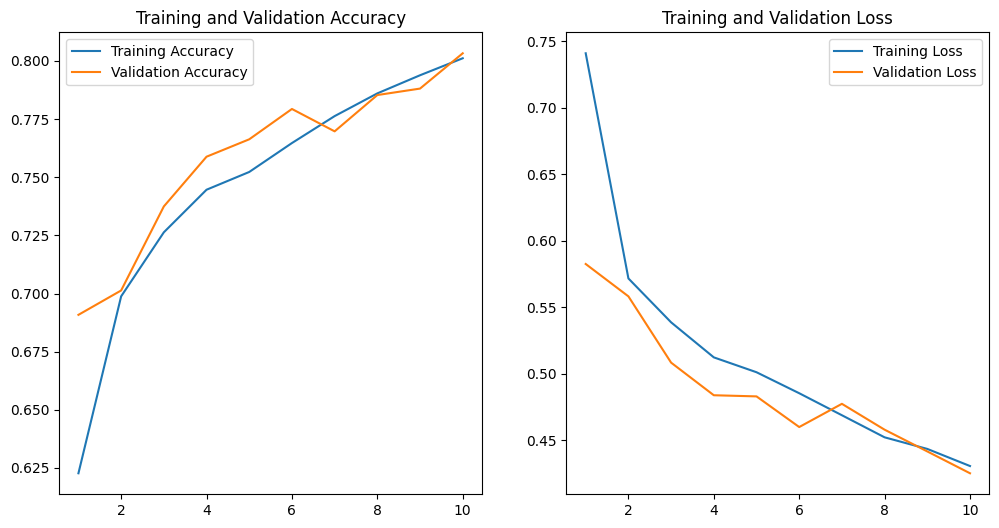

In [48]:
# once model is completed, shows validation + iteration accuracy over training for 10 epochs
# e.g, % accuracy over % means our CNN model correctly predicted labels of appropriately % of training examples after complete passes thru entire training dataset
  # found by div # of correctly classified imgs // total # of samples in training set

# finally, we can now visualise our CNN model performance
# our training accuracy (in blue) over % (!) while our validation accuracy (red) over %
# validation loss reaches its min after only 5 epochs
#NOTE --> if there is a large gap b/w training accuracy, indicates model is overfitting

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [50]:
# finally, test + predict whether our CNN can accurately classify an image as Dog or Cat

# 2 images of dog (Dog = 198.jpg) and cat (CAT = 16.jpg) + test CNN model !
from keras.preprocessing.image import img_to_array

image_path = '/content/PetImages'
img = load_img(image_path + '/Dog/198.jpg', target_size=(128,128))
img = img_to_array(img) # Convert PIL Image to numpy array
img = img / 255.0 #normalise image
img = img.reshape(1,128,128,3) #reshape for prediction

# now make prediction
pred = model.predict(img)
if pred[0] > 0.5:
  label = 'Predicted: **Dog** '
  print(label)
else:
  label = 'Predicted: **Cat** '
  print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted: **Dog** 
